<a href="https://colab.research.google.com/github/YunChenLi/tensorflow-deep-learning/blob/main/Number_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils #用來後續將label標籤轉換為one-hot-encoding
from matplotlib import pyplot as plt

#載入mnist 資料庫訓練資料，並自動分為 訓練組 以及 測試組
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
y_train #標籤是0-9的數字 資料型別為unit8

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
X_train.shape #60000張資料 28*28像數 

(60000, 28, 28)

In [ ]:
from keras import models 
from keras import layers

#建立簡單的建模
model = Sequential()
#add input layer, 隱藏層(hidden layer)(通常超過兩層的hidden layers就是深度學習)有256個變數
#model.add(layers.Dense(512, activation = 'relu', imput_shape=(28*28,)))
model.add(Dense(units = 256, input_dim=784, kernel_initializer='normal', activation='relu'))

#Add output layer
#model.add(layer.Dense(10, activation = 'softmax))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
#activation function: 非線性函數（像是sigmoid適合使用二分法在[0,1]之間 中間只有一小段模糊地帶適用於二分法
#activation function: softmax 可以將Ｙ轉為機率值 且所有類別機率值為1, 

#選擇loss function優化方法跟成效衡量方式 #以上已經有兩層Ｄense layers, 還需再加上以下進行編譯complilation
#optimizer = 'rmsprop', 'adam'
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

#將training的label進行 one-hot-encoding, convert number to one-hot-encoding(像是7轉化one-hot-encofing會變成0000001000, 第7個數字會是1)
y_TrainOneHot = np_utils.to_categorical(y_train)
y_TestOneHot = np_utils.to_categorical(y_test)

#將training的input轉為2維(28,28)->(28*28)
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')

X_train_norm = X_train_2D/255
X_test_norm = X_test_2D/255

#進行訓練，訓練過程會存在train history變數中
train_history = model.fit(x=X_train_norm, y=y_TrainOneHot, validation_split = 0.2, epochs = 10, batch_size=800, verbose=2)

#訓練成果(分數)
scores = model.evaluate(X_test_norm, y_TestOneHot)
print("\t[info]Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

#Scores(測試集的準確率)比訓練資料準確率低一點，中間的差距就是過度配適（overfitting)

#預測
X = X_test_norm[0:10,:]
predictions = model.predict(X)

#get prediction result
print(predictions)



Epoch 1/10
60/60 - 1s - loss: 0.6428 - accuracy: 0.8406 - val_loss: 0.3215 - val_accuracy: 0.9110
Epoch 2/10
60/60 - 1s - loss: 0.2949 - accuracy: 0.9173 - val_loss: 0.2458 - val_accuracy: 0.9320
Epoch 3/10
60/60 - 1s - loss: 0.2258 - accuracy: 0.9361 - val_loss: 0.1992 - val_accuracy: 0.9440
Epoch 4/10
60/60 - 1s - loss: 0.1854 - accuracy: 0.9473 - val_loss: 0.1703 - val_accuracy: 0.9528
Epoch 5/10
60/60 - 1s - loss: 0.1552 - accuracy: 0.9554 - val_loss: 0.1526 - val_accuracy: 0.9561
Epoch 6/10
60/60 - 1s - loss: 0.1330 - accuracy: 0.9628 - val_loss: 0.1329 - val_accuracy: 0.9619
Epoch 7/10
60/60 - 1s - loss: 0.1150 - accuracy: 0.9668 - val_loss: 0.1277 - val_accuracy: 0.9631
Epoch 8/10
60/60 - 1s - loss: 0.1001 - accuracy: 0.9713 - val_loss: 0.1120 - val_accuracy: 0.9661
Epoch 9/10
60/60 - 1s - loss: 0.0879 - accuracy: 0.9747 - val_loss: 0.1049 - val_accuracy: 0.9679
Epoch 10/10
60/60 - 1s - loss: 0.0777 - accuracy: 0.9783 - val_loss: 0.1045 - val_accuracy: 0.9688
313/313 [==========

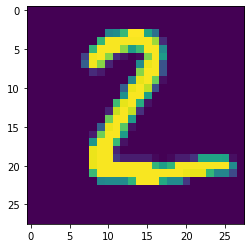

In [ ]:
plt.imshow(X_test[1])
plt.show()

In [ ]:
train_history.history


{'accuracy': [0.8441874980926514,
  0.9157083630561829,
  0.9354166388511658,
  0.9467291831970215,
  0.9568125009536743,
  0.9628541469573975,
  0.9684374928474426,
  0.9724791646003723,
  0.9758541584014893,
  0.979729175567627],
 'loss': [0.6388621926307678,
  0.29774507880210876,
  0.22910749912261963,
  0.18546396493911743,
  0.152441143989563,
  0.1297166496515274,
  0.1106581762433052,
  0.09607218205928802,
  0.08481647074222565,
  0.07393589615821838],
 'val_accuracy': [0.9104999899864197,
  0.9317499995231628,
  0.9435833096504211,
  0.9524166584014893,
  0.9578333497047424,
  0.9624999761581421,
  0.9642500281333923,
  0.9670000076293945,
  0.9693333506584167,
  0.9707499742507935],
 'val_loss': [0.33250051736831665,
  0.24478808045387268,
  0.20165503025054932,
  0.16640841960906982,
  0.14446403086185455,
  0.13094298541545868,
  0.1218918114900589,
  0.11323719471693039,
  0.10530684143304825,
  0.09892291575670242]}

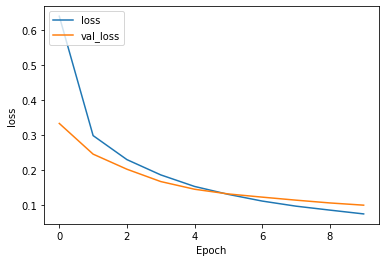

In [ ]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','val_loss'], loc = 'upper left')
plt.show()